#Loan Application Status Prediction
##Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.
###Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

###Dependent Variable (Target Variable):
- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

##Importing Necessary Libraries

In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
import pickle

##Download and Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('/content/loan_prediction.csv')

##Data Preprocessing
###Showing first 5 values

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###Showing last 5 values

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


###Shape of the dataset

In [5]:
df.shape

(614, 13)

###Summary of the dataset

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###Check Datatypes in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##Removing Irrelevant columns

In [8]:
df.drop(columns=['Loan_ID'],inplace=True)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###Checking for Null Values

In [10]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


###Filling Null Values

In [11]:
# Gender column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
# Married column
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [13]:
# Dependents Column
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [14]:
# Self_Employed Column
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
# LoanAmount Column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [16]:
# Loan_Amount_Trem Column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [17]:
# Credit_History Column
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [18]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#####No null values are present now in the dataset

###Checking for Duplicated Values

In [19]:
df.duplicated().sum()

0

In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##Exploratory Data Analysis (EDA)

###Label Encoding

In [21]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Education'] = labelencoder.fit_transform(df['Education'])
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Gender column count

In [23]:
# Counting the occurance of each value in Gender column
df['Gender'].value_counts()

,count
Gender,
1,502
0,112


###Ploting Gender column count

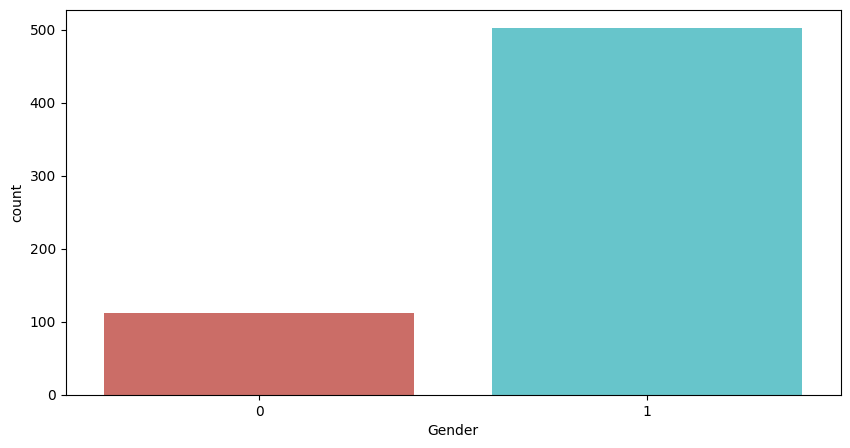

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data= df, palette = 'hls' )
plt.show()

###Dependents Count

In [25]:
# Counting the accurance of each value in Dependent column
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


###Replacing the Column

In [26]:
# Replcae 3+ with 4
df=df.replace(to_replace='3+',value=4)

In [27]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


###Ploting Dependents Count

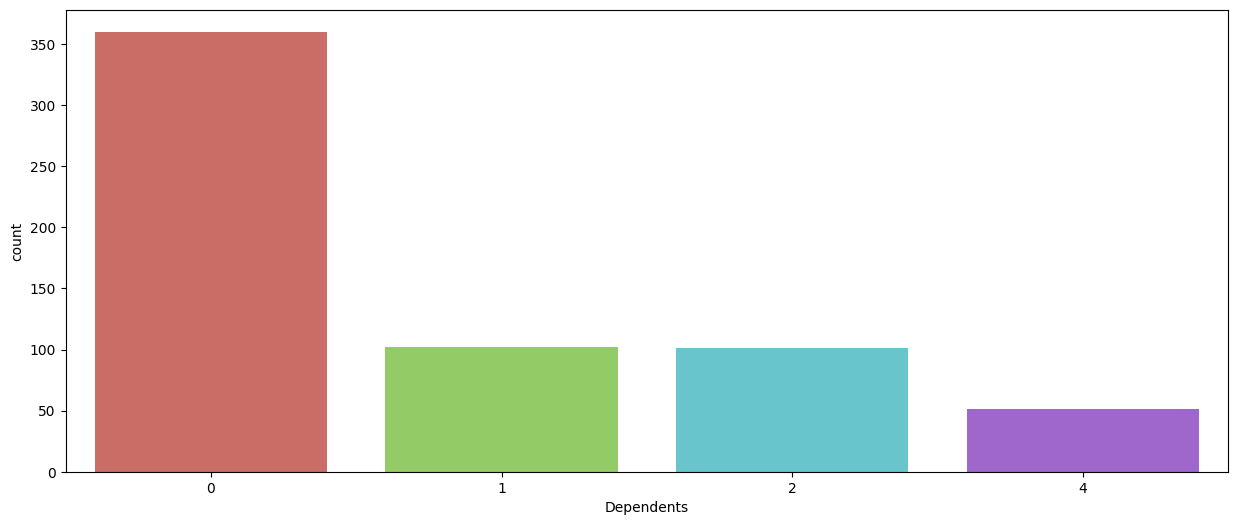

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='Dependents', data = df, palette='hls')
plt.show()

##Data Visualization

###Education vs Loan Status

<Axes: xlabel='Education', ylabel='count'>

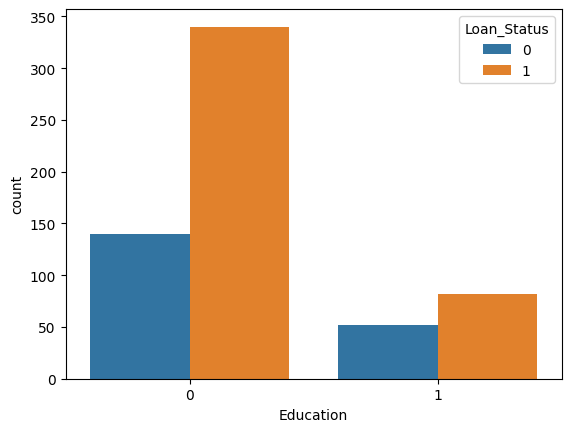

In [29]:
#Education vs Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

###Maritial Status vs Loan-status

<Axes: xlabel='Married', ylabel='count'>

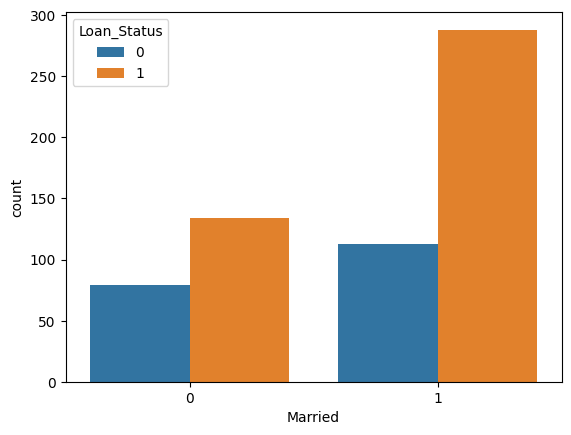

In [30]:
# Maritial Status vs Loan-status

sns.countplot(x='Married',hue='Loan_Status',data=df)

###Loan status vs Gender

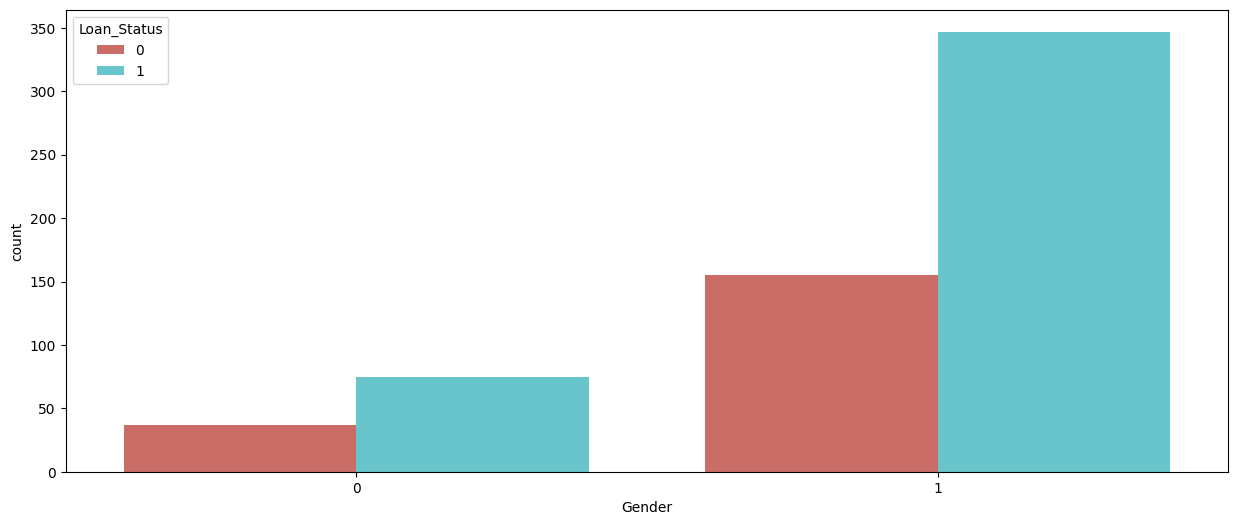

In [31]:
# comparing loan status with gender column
plt.figure(figsize=(15,6))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=df , palette='hls')
plt.show()

###Count of Loan_Amount_Term

In [32]:
#Counting the occurence of each value with Loan_amount_term column
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


###Plot of Loan_Amount_Term

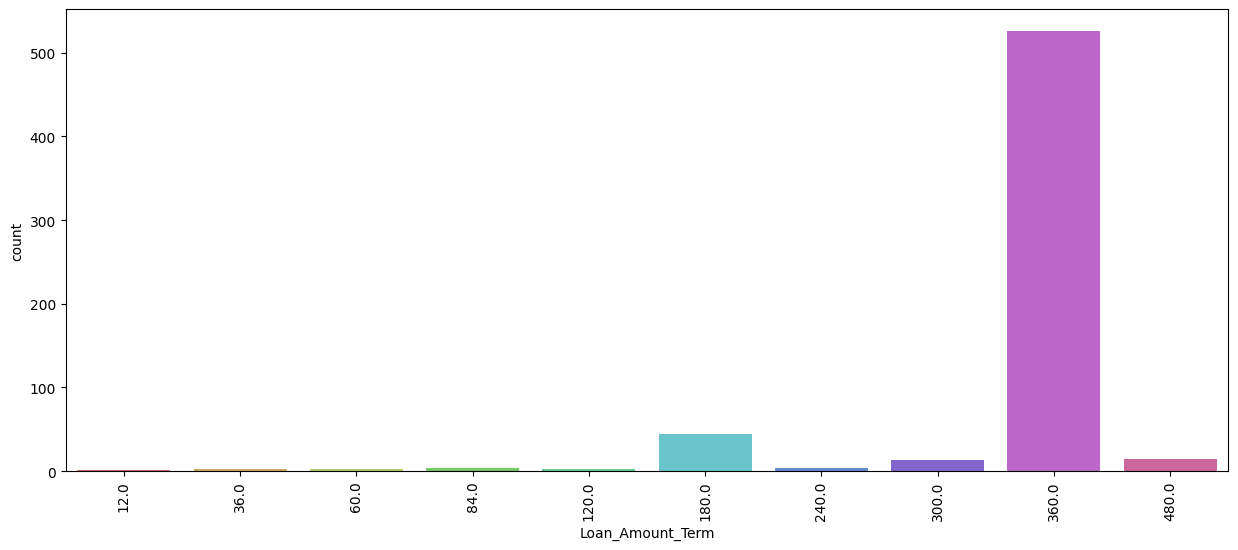

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(x='Loan_Amount_Term', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

###Loan status vs Applicant Income

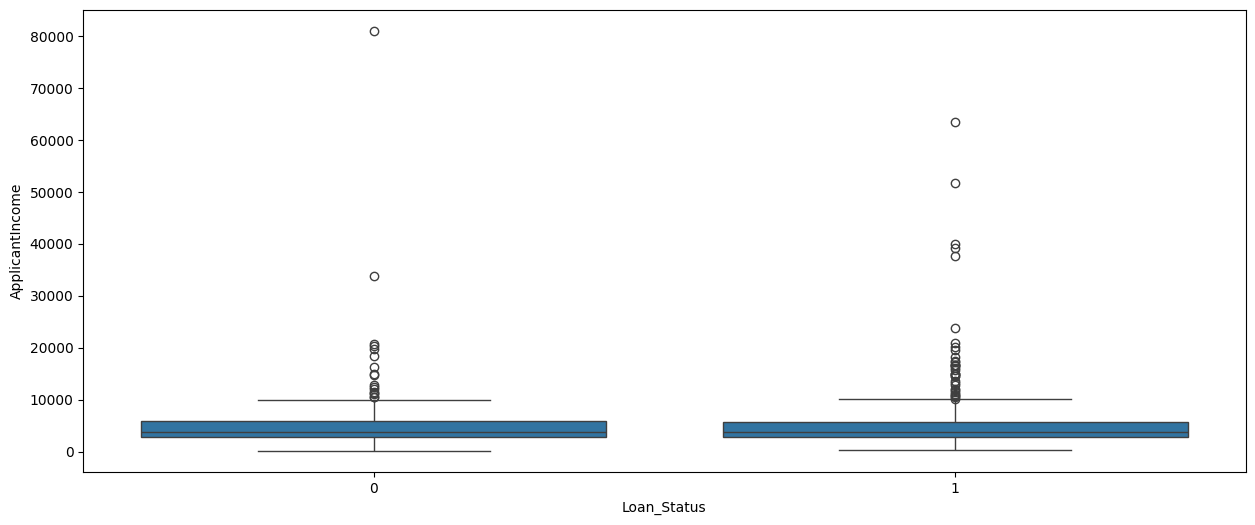

In [34]:
# plotting boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y ='ApplicantIncome', data=df)
plt.show()

###Loan status vs Coapplicant Income

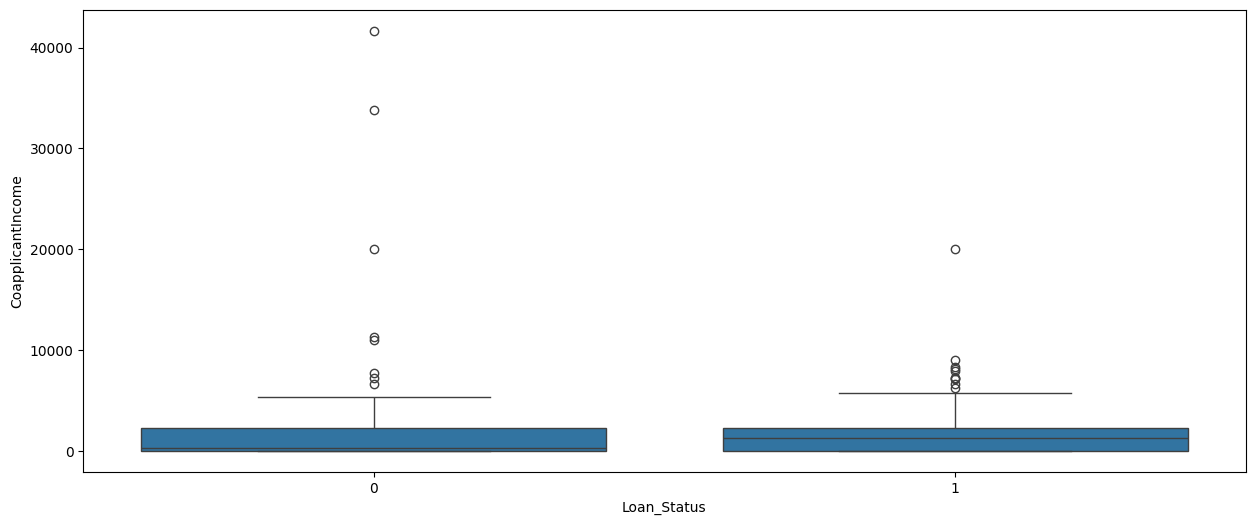

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data=df)
plt.show()

###Check for Multicollinearity

In [36]:
# Showing correlation through heatmap
plt.figure(figsize=(7,7))
# Calculate correlations for numerical columns only
corr = df.select_dtypes(include=['number']).corr()
print(corr)

                     Gender   Married  Education  Self_Employed  \
Gender             1.000000  0.364569   0.045364      -0.000525   
Married            0.364569  1.000000   0.012304       0.004489   
Education          0.045364  0.012304   1.000000      -0.010383   
Self_Employed     -0.000525  0.004489  -0.010383       1.000000   
ApplicantIncome    0.058809  0.051708  -0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948  -0.062290      -0.016100   
LoanAmount         0.106904  0.146546  -0.168759       0.115100   
Loan_Amount_Term  -0.074030 -0.100912  -0.073928      -0.033739   
Credit_History     0.009170  0.010938  -0.073658      -0.001550   
Property_Area     -0.025752  0.004257  -0.065243      -0.030860   
Loan_Status        0.017987  0.091478  -0.085884      -0.003700   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.058809           0.082912    0.106904   
Married                   0.051708           0.075948    

<Figure size 700x700 with 0 Axes>

###Ploting Heatmap

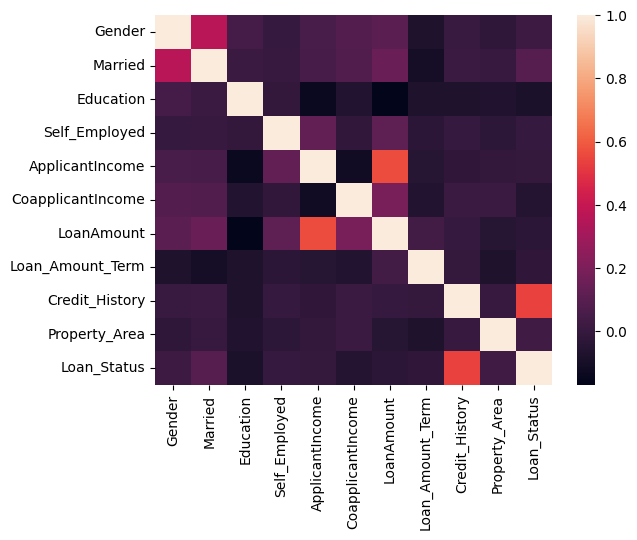

In [37]:
sns.heatmap(corr)
plt.show()

###Property Area vs Loan Status

<Axes: xlabel='Property_Area', ylabel='count'>

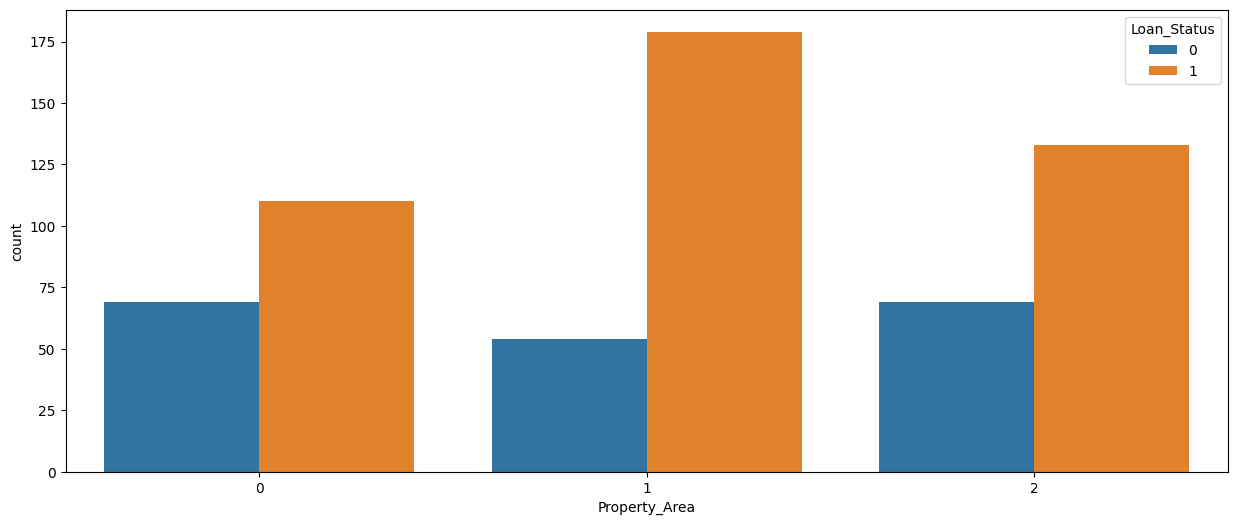

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = df)

###Credict History vs Loan status

<Axes: xlabel='Credit_History', ylabel='count'>

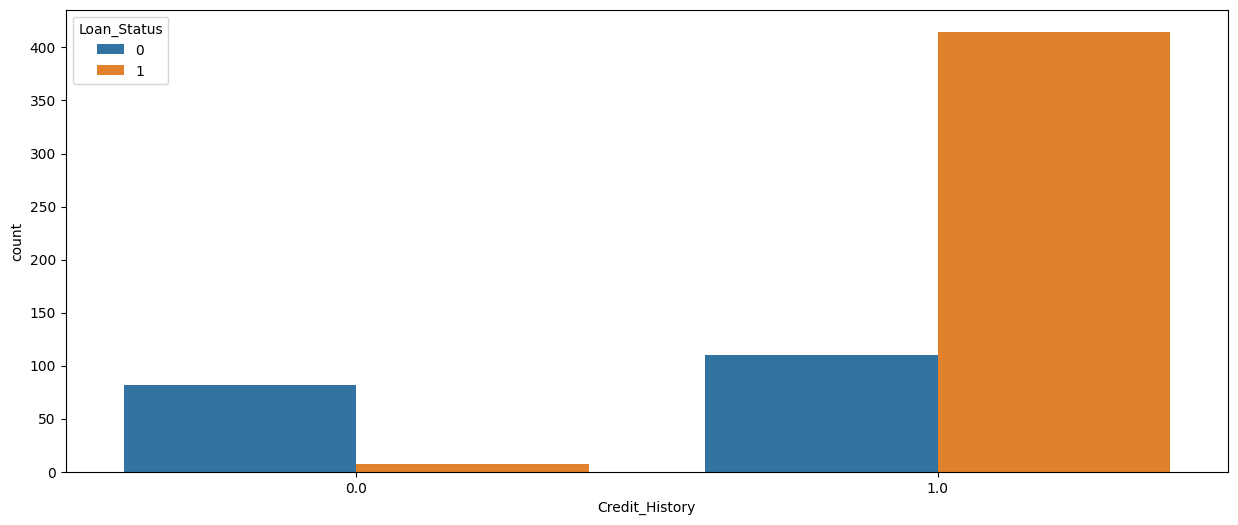

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data = df)

###Loan amount term vs Laon status

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

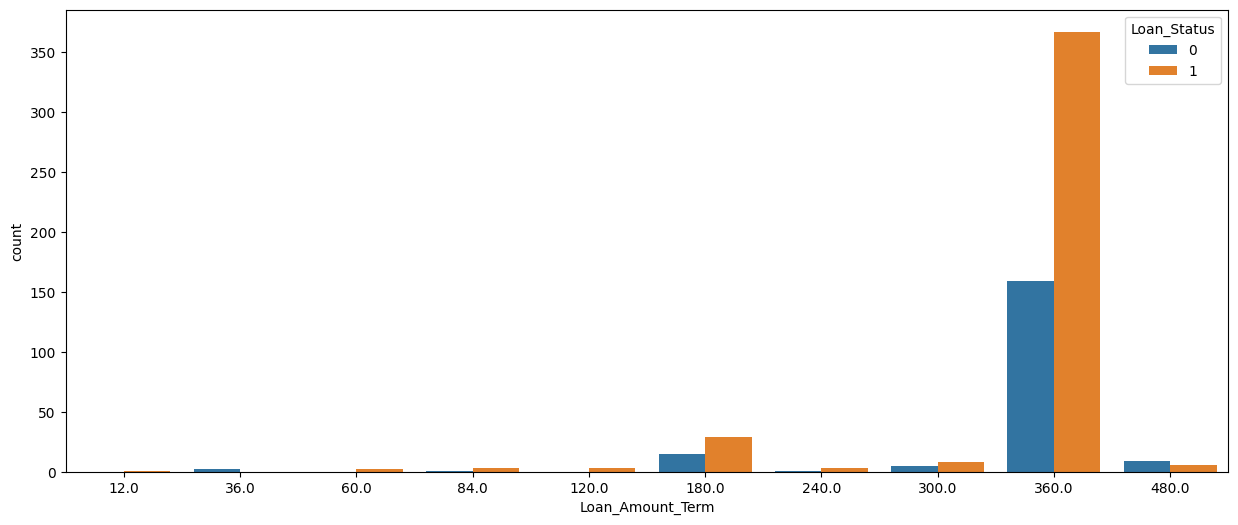

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Loan_Amount_Term', hue='Loan_Status', data = df)

###Self employed vs Loan status

<Axes: xlabel='Self_Employed', ylabel='count'>

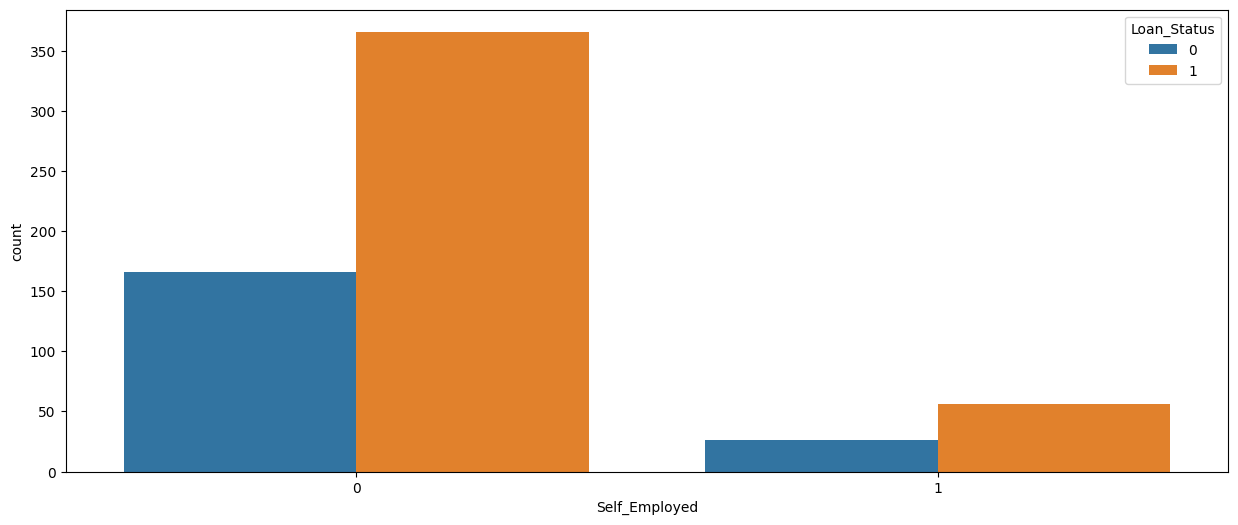

In [41]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'Self_Employed', hue = 'Loan_Status', data = df)

##Split X and Y

In [42]:
X=df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [43]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [44]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


##Train Test Split

In [45]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
random_state = 42)

In [46]:
print(X_train.shape)
print(X_test.shape)

(429, 11)
(185, 11)


###Feature Scaling

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Selection
##Random Forest Algorithm

In [48]:
rf = RandomForestClassifier(max_depth=4, random_state = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [49]:
X_train_pred_rf = rf.predict(X_train)
tarining_data_acc_rf = accuracy_score(X_train_pred_rf,y_train)

In [50]:
print(tarining_data_acc_rf)

0.8228438228438228


In [51]:
X_test_pred_rf = rf.predict(X_test)
test_data_acc_rf=accuracy_score(X_test_pred_rf,y_test)

In [52]:
print(test_data_acc_rf)

0.7783783783783784


In [53]:
print(classification_report(y_test, X_test_pred_rf))
print(confusion_matrix(y_test, X_test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        65
           1       0.75      0.98      0.85       120

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.81      0.78      0.75       185

[[ 26  39]
 [  2 118]]


##Logistic Regression

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
X_train_pred_lr= lr.predict(X_train)
training_data_acc_lr=accuracy_score(X_train_pred_lr,y_train)

In [56]:
print(training_data_acc_lr)

0.8205128205128205


In [57]:
X_test_pred_lr = lr.predict(X_test)
test_data_acc_lr=accuracy_score(X_test_pred_lr,y_test)

In [58]:
print(test_data_acc_lr)

0.7837837837837838


In [59]:
print(classification_report(y_test, X_test_pred_lr))
print(confusion_matrix(y_test, X_test_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]


##Decision Tree Classifier

In [60]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
X_train_pred_dt= dt.predict(X_train)
training_data_acc_dt=accuracy_score(X_train_pred_dt,y_train)

In [62]:
print(training_data_acc_dt)

1.0


In [63]:
X_test_pred_dt = dt.predict(X_test)
test_data_acc_dt=accuracy_score(X_test_pred_dt,y_test)

In [64]:
print(test_data_acc_dt)

0.6648648648648648


In [65]:
print(classification_report(y_test, X_test_pred_dt))
print(confusion_matrix(y_test, X_test_pred_dt))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        65
           1       0.75      0.73      0.74       120

    accuracy                           0.66       185
   macro avg       0.63      0.64      0.63       185
weighted avg       0.67      0.66      0.67       185

[[35 30]
 [32 88]]


##KNN Classifier

In [66]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
X_train_pred_knn= knn.predict(X_train)
training_data_acc_knn=accuracy_score(X_train_pred_knn,y_train)

In [68]:
print(training_data_acc_knn)

0.8298368298368298


In [69]:
X_test_pred_knn = knn.predict(X_test)
test_data_acc_knn=accuracy_score(X_test_pred_knn,y_test)

In [70]:
print(test_data_acc_knn)

0.7567567567567568


In [71]:
print(classification_report(y_test, X_test_pred_knn))
print(confusion_matrix(y_test, X_test_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.43      0.55        65
           1       0.75      0.93      0.83       120

    accuracy                           0.76       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.76      0.76      0.73       185

[[ 28  37]
 [  8 112]]


##Results of All Models

In [72]:
list2=[test_data_acc_rf,test_data_acc_lr,test_data_acc_dt,test_data_acc_knn]

In [73]:
list1=['Random Forest','Logistic Regression','Decision Tree','KNN']

In [74]:
pd.DataFrame({'Model':list1,'Testing Accuracy':list2}).sort_values(by='Testing Accuracy',ascending=False)

,Model,Testing Accuracy
1,Logistic Regression,0.783784
0,Random Forest,0.778378
3,KNN,0.756757
2,Decision Tree,0.664865


##Hyper Parameter Tunning For All Models

###Random Forest Hyper Parameter tunning

In [76]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5,scoring= 'accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8204651162790698


###Logistic Regression Hyper parameter tunning

In [77]:
lr_model = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5,scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.8204651162790698


###Decision Tree Hyper parameter tunning

In [78]:
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best score for Decision Tree: 0.7808481532147743


###KNN Hyper paramater tunning

In [79]:
knn_model = KNeighborsClassifier()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best score for KNN: {grid_search_knn.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score for KNN: 0.8111354309165527


##Retraining models with best parameters   
###Random Forest

In [80]:
rf1 = RandomForestClassifier(max_depth = None, bootstrap = True, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 200)
rf1.fit(X_train, y_train)

X_train_pred_rf1 = rf1.predict(X_train)
tarining_data_acc_rf1 = accuracy_score(X_train_pred_rf1,y_train)

X_test_pred_rf1 = rf1.predict(X_test)
test_data_acc_rf1 = accuracy_score(X_test_pred_rf1,y_test)

print('classification_report: ',classification_report(y_test, X_test_pred_rf1))
print('confusion_matrix: ',confusion_matrix(y_test, X_test_pred_rf1))
print('Accuracy: ',test_data_acc_rf1)

classification_report:                precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

confusion_matrix:  [[ 27  38]
 [  2 118]]
Accuracy:  0.7837837837837838


###Logistic Regression

In [81]:
lr1 = LogisticRegression(C= 0.1, max_iter= 100, penalty = 'l1', solver = 'liblinear')
lr1.fit(X_train, y_train)

X_train_pred_lr1 = lr1.predict(X_train)
training_data_acc_lr1 = accuracy_score(X_train_pred_lr1,y_train)

X_test_pred_lr1 = lr1.predict(X_test)
test_data_acc_lr1 = accuracy_score(X_test_pred_lr1,y_test)

print('Classification_Report: ',classification_report(y_test, X_test_pred_lr1))
print('Confusion_matrix: ',confusion_matrix(y_test, X_test_pred_lr1))
print('Accuracy: ',test_data_acc_lr1)

Classification_Report:                precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

Confusion_matrix:  [[ 27  38]
 [  2 118]]
Accuracy:  0.7837837837837838


###Decision Tree

In [82]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_leaf = 4, min_samples_split = 2, splitter = 'random')
dt1.fit(X_train,y_train)

X_train_pred_dt1 = dt1.predict(X_train)
training_data_acc_dt1 = accuracy_score(X_train_pred_dt1,y_train)

X_test_pred_dt1 = dt1.predict(X_test)
test_data_acc_dt1 = accuracy_score(X_test_pred_dt1,y_test)

print('Classification_Report: ',classification_report(y_test, X_test_pred_dt1))
print('Confusion_matrix: ',confusion_matrix(y_test, X_test_pred_dt1))
print('Accuracy: ',test_data_acc_dt1)

Classification_Report:                precision    recall  f1-score   support

           0       0.59      0.49      0.54        65
           1       0.75      0.82      0.78       120

    accuracy                           0.70       185
   macro avg       0.67      0.65      0.66       185
weighted avg       0.69      0.70      0.70       185

Confusion_matrix:  [[32 33]
 [22 98]]
Accuracy:  0.7027027027027027


###KNN Classifier

In [83]:
knn1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'distance')
knn1.fit(X_train,y_train)

X_train_pred_knn1 = knn1.predict(X_train)
training_data_acc_knn1 = accuracy_score(X_train_pred_knn1,y_train)

X_test_pred_knn1 = knn1.predict(X_test)
test_data_acc_knn1 = accuracy_score(X_test_pred_knn1,y_test)

print('Classification_Report: ',classification_report(y_test, X_test_pred_knn1))
print('Confusion_matrix: ',confusion_matrix(y_test, X_test_pred_knn1))
print('Accuracy: ',test_data_acc_knn1)

Classification_Report:                precision    recall  f1-score   support

           0       0.68      0.43      0.53        65
           1       0.74      0.89      0.81       120

    accuracy                           0.73       185
   macro avg       0.71      0.66      0.67       185
weighted avg       0.72      0.73      0.71       185

Confusion_matrix:  [[ 28  37]
 [ 13 107]]
Accuracy:  0.7297297297297297


##Results of All Models After Hyper parametrs

In [84]:
list11=['Random Forest','Logistic Regression','Decision Tree','KNN']
list22=[test_data_acc_rf1,
        test_data_acc_lr1,
        test_data_acc_dt1,
        test_data_acc_knn1]
pd.DataFrame({'Model':list11,'Testing Accuracy':list22}).sort_values(by='Testing Accuracy',ascending=False)

,Model,Testing Accuracy
0,Random Forest,0.783784
1,Logistic Regression,0.783784
3,KNN,0.729730
2,Decision Tree,0.702703


##Saving model in Pickle Format

In [85]:
pickle.dump(rf1,open('Yuva_file','wb'))

##Loading the saved model

In [86]:
y_model = pickle.load(open('Yuva_file','rb'))

In [87]:
y_model

RandomForestClassifier(min_samples_leaf=4, n_estimators=200)

##Prediction using saved model

In [88]:
new_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}

In [89]:
new_data_df = pd.DataFrame([new_data])

In [90]:
new_data_df['Gender'] = labelencoder.fit_transform(new_data_df['Gender'])
new_data_df['Married'] = labelencoder.fit_transform(new_data_df['Married'])
new_data_df['Education'] = labelencoder.fit_transform(new_data_df['Education'])
new_data_df['Self_Employed'] = labelencoder.fit_transform(new_data_df['Self_Employed'])
new_data_df['Property_Area'] = labelencoder.fit_transform(new_data_df['Property_Area'])

In [91]:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)

In [92]:
status_encoder = LabelEncoder()
status_encoder.fit(df['Loan_Status'])

predicted_status = rf1.predict(new_data_scaled)
predicted_status = status_encoder.inverse_transform(predicted_status)

print("Predicted Loan Status:", "Approved" if predicted_status[0] == 1 else "Rejected")

Predicted Loan Status: Approved
